In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import shelve
import pandas as pd
import h5py
import glob
import astropy
from astropy.table import Table as Table

In [61]:
#filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_0/pzout_0.h5'
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_hdfn_gen_METACAL4_DES1212-3540.h5'
with h5py.File(filename) as f:
    bpzres={}
    for key in list(f.keys()):
        bpzres[key] = np.array(f[key])
        
#filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_0/table.h5'
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/pzinput/pzinput_METACAL_4_bands_DES1212-3540.h5'
with h5py.File(filename) as f:
    photometry={}
    for key in list(f['df'].keys()):
        photometry[key] = np.array(f['df'][key])

In [66]:
photometry

{'axis0': array([b'COADD_OBJECT_ID', b'TILENAME', b'MAG_AUTO_G', b'MAG_AUTO_R',
        b'MAG_AUTO_I', b'MAG_AUTO_Z', b'MAGERR_AUTO_G', b'MAGERR_AUTO_R',
        b'MAGERR_AUTO_I', b'MAGERR_AUTO_Z'], dtype='|S15'),
 'axis1': array([    0,     1,     2, ..., 17462, 17463, 17464]),
 'block0_items': array([b'TILENAME'], dtype='|S8'),
 'block0_values': array([[b'DES1212-3540'],
        [b'DES1212-3540'],
        [b'DES1212-3540'],
        ...,
        [b'DES1212-3540'],
        [b'DES1212-3540'],
        [b'DES1212-3540']], dtype='|S12'),
 'block1_items': array([b'MAG_AUTO_G', b'MAG_AUTO_R', b'MAG_AUTO_I', b'MAG_AUTO_Z',
        b'MAGERR_AUTO_G', b'MAGERR_AUTO_R', b'MAGERR_AUTO_I',
        b'MAGERR_AUTO_Z'], dtype='|S13'),
 'block1_values': array([[23.13856506, 22.52129745, 22.24631691, ...,  0.0530699 ,
          0.06959395,  0.43703279],
        [24.73575401, 23.56234169, 23.2243309 , ...,  0.05700174,
          0.08241542,  0.18520641],
        [24.35372734, 23.9569912 , 23.46812248, ...

In [62]:
fluxes, flux_errs, mags, magerrs = photometry['block0_values'][:,0:4], photometry['block0_values'][:,4:8], photometry['block0_values'][:,8:12],photometry['block0_values'][:,12:16]

In [63]:
z_b, z_ml, z_samp = bpzres['Z_B'], bpzres['Z_ML'], bpzres['Z_SAMP']

In [64]:
fluxes[:,0]

array([b'DES1212-3540', b'DES1212-3540', b'DES1212-3540', ...,
       b'DES1212-3540', b'DES1212-3540', b'DES1212-3540'], dtype='|S12')

In [65]:
plt.hist(mags[:,0], bins=np.linspace(15, 30, 100), histtype='step', label='g');
plt.hist(mags[:,1], bins=np.linspace(15, 30, 100), histtype='step', label='r');
plt.hist(mags[:,2], bins=np.linspace(15, 30, 100), histtype='step', label='i');
plt.hist(mags[:,3], bins=np.linspace(15, 30, 100), histtype='step', label='z');
plt.legend()

IndexError: index 0 is out of bounds for axis 1 with size 0

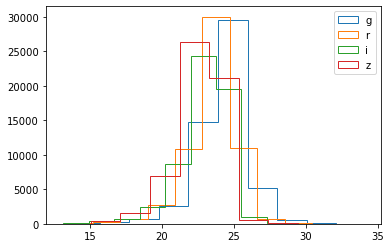

In [51]:
plt.hist(mags[:,0][mags[:,0]<98.], histtype='step', label='g');
plt.hist(mags[:,1][mags[:,1]<98.], histtype='step', label='r');
plt.hist(mags[:,2][mags[:,2]<98.], histtype='step', label='i');
plt.hist(mags[:,3][mags[:,3]<98.], histtype='step', label='z');
plt.legend()

In [ ]:
bpzres['Z_ML']

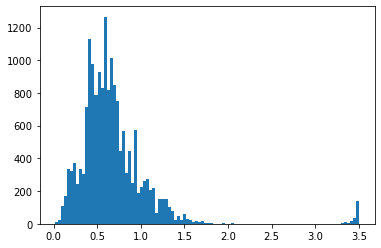

In [60]:
plt.hist(bpzres['Z_B'], bins=100)
plt.show()